# Cost Function 그리기

In [2]:
import numpy as np
import matplotlib.pyplot as plt

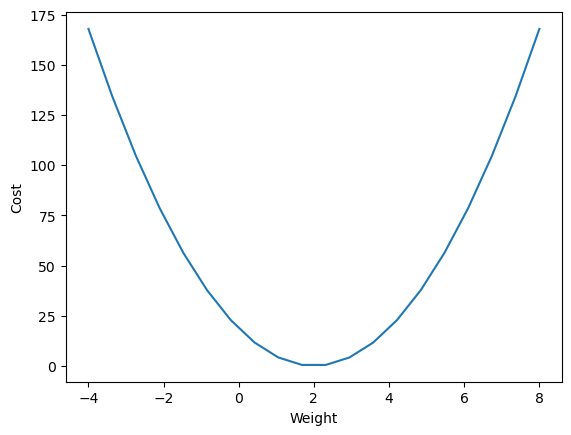

In [4]:
# Cost Function
# w: 가중치(초기: 임의값)
# x: 독립변수 (리스트) 
# y: 종속변수 (리스트)
# b: 절편(초기: 임의값)

def MSE(w, x, y, b): #비용함수 정의 
    s = 0
    for i in range(len(x)): # 데이터의 개수만큼 for문 돌림 # 각 사례별 오차를 구함 
        s += (y[i] - (w * x[i] + b)) ** 2 
        # 각 사례에 대한 오차 함수의 값을 더함 y[i](정답) - w*x[i]+b(예측값, 선형식 ) 
        # 오차를 더 커보이게 하기 위해서 제곱함 ! 
        #=> 평균제곱오차 / s에 누적하다가 갯수만큼 나눠줌 
        
    return s/len(x)

# y = 2x + 0.1 모델 가정  weight 최적의 값은 2!!
# 임의 값
x = [1., 2., 3.] # 독립변수 , Feature
y = [2.1, 4.1, 6.1] # 종속변수, label
b = 0.1 

w_val = [] # weight값 저장
cost_val = [] # 비용함수값(오차값) 저장 
#x축: weight y축: loss 그래프 그리기 위해서 리스트에 값을 넣어줌/ 교안에서 경사하강법 그래프 참고!

for w in np.linspace(-4, 8, 20):  #linspace -4~8까지 20개로 임의로 균등분할   
    c = MSE(w, x, y, b)
    w_val.append(w) # 현재의 weight값 저장
    cost_val.append(c) # loss 값 저장

#### cost 값을 이용한 그래프 그리기 ####
plt.plot(w_val, cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()
# y = 2x + 0.1 모델 가정하여 그려본 그래프로 weight값이 2일때 가장 작은 값을 보여줌 

# 가중치 학습

## 데이터 

In [5]:
w = 1.0 # 초기가중치
b = 1.0 # 초기 절편
pt1 = (-0.1, -0.1*w+b)
pt2 =(0.16, 0.16*2+b)
print(pt1,pt2)

(-0.1, 0.9) (0.16, 1.32)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

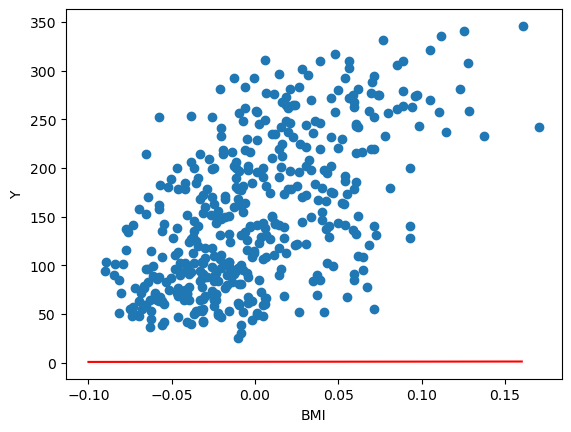

In [1]:
from sklearn.datasets import load_diabetes 
# sklearn 사이킷런? 이라고 함~  머신러닝할 때 각종 알고리즘이 있는 패키지
# load_diabetes => 당뇨병 환자 샘플 데이터 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes = load_diabetes() # 당뇨병 환자 데이터 로드
# 번치 데이터는 딕셔너리와 비슷하다
print(diabetes.DESCR) # 데이터 셋의 설명글을 볼 수 있다. 
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
# 번치 형태의 데이터를 가져올때 data 속성을 통해 가져오면 다차원으로 가져와서 데이터 프레임으로 사용한다. 
# feature_names 속성을 통해 독립변수의 값을 가져온다.
# df.head() #  0~1 사이로 스케일이 이미 되어있는 정제가 된 데이터이다.

# 정답보기
df['target'] = diabetes.target
# target 속성은 종속변수 값을 가져온다. => 질병
# df.head()

w = 1.0 # 초기가중치
b = 1.0 # 초기 절편
print(np.min(df['bmi']), np.max(df['bmi'])) # bmi값을 가져와서 최소값과 최대값을 찾음 

# x의 값과 y값을 출력하는데 x의 값을 bmi값을 사용할 것임
# 대략 -0.1 ~ 0.17이기 때문에 pt1에 0.1을 시작점으로, pt2에 0.16을 끝점으로 사용함
# 시작점 포인트 pt1
pt1 = (-0.1, -0.1*w+b) # 회귀선의 시작점으로 사용
# 끝점 포인트 pt2
pt2 =(0.16, 0.16*2+b) # 회귀선의 끝점으로 사용

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # y에 들어갈 값을 두번째 리스트에 넣는다. 
# plot([x좌표 리스트], [y좌표 리스트])
# plt.show() # 임의의 기울기 1을 주었을때 선형식

# 실제데이터
plt.scatter(df['bmi'], df['target'])
plt.xlabel('BMI')
plt.ylabel('Y')
plt.show()
# 당뇨병환자의 bmi와 질병 y의 상관관계를 산점도로 그림
# 선형회귀식은 학습이 되지 않은 임의의 기울기 값
# 학습을 통해 최적의 w값을 찾아내면 산점도를 가로지르는 선이 그려질 예정

In [3]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## 학습

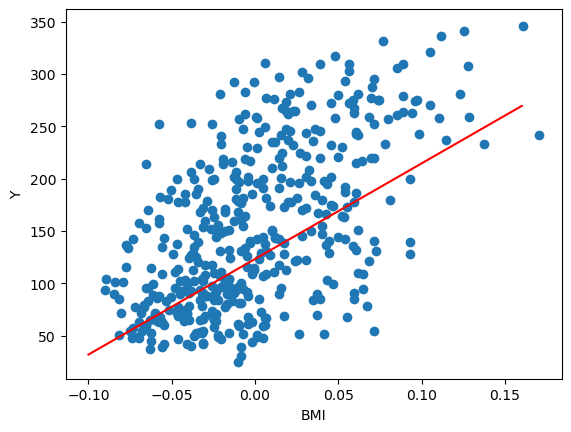

In [3]:
for i in range(100):  # 100번 반복하여 학습
    for x_i, y_i in zip(df['bmi'], df['target']): # zip(x값, y값)
        y_hat = w*x_i+b  #y hat 예측값
        w = w-(y_hat - y_i) * x_i
        b = b-(y_hat - y_i)
        
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.16, 0.16*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')

#산점도
plt.scatter(df['bmi'], df['target'])
plt.xlabel('BMI')
plt.ylabel('Y')
plt.show()

메롱메롱 ~ 메롱메롱~ 시러시러~시룸시룸~ㅠ

# 단변량 데이터의 Linear Regression
- 사이킷런을 이용함
- https://scikit-learn.org

In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀모형/ 위의 내용이 구현이 되어있음
import numpy as np

# 1)데이터 준비
x = np.array([1, 3, 2, 4, 7, 4, 10, 6, 12, 2, 4, 3, 8, 5, 3, 10]) # -> [[1],[2],...]
y = np.array([3, 9, 6, 7, 10, 6, 12, 2, 4, 3, 8, 5, 3, 10])

# 2) 모델 준비 
model = LinearRegression() # 매개변수로 여러가지 파라메터를 넣을 수 있다. 

# 3) 학습(fitiing)
model.fit(x, y) # y = wx + b 선형 식을 만들어서 최적의 선을 만드는 것/ 최적의 W와 b값을 찾음

# 4) 평가
# 얼마나 잘 피팅 되었는지 얼마나 예측력이 있는지 평가
r_square = model.score(x, y)
print('R square:', r_square)

#2차원 데이터를 넣어햐는데 1차원 데이터를 넣어서 오류남 
# 하나의 스칼라값으로 들어가면 안됨
# x 값 단일 스칼라값으로 들어갔기 때문에 오류남

In [10]:
from sklearn.linear_model import LinearRegression # 선형회귀모형/ 위의 내용이 구현이 되어있음
import numpy as np

# 1)데이터 준비
x = np.array([1, 3, 2, 4, 7, 4, 9, 2, 3, 2, 6, 3, 2, 7]) 
# (14,) -> (14, 1) 
x = np.expand_dims(x, axis=1) # x = reshape(-1, 1) 열의 값은 1이면서 행은 모든 값의 데이터로 만든다.
y = np.array([3, 9, 6, 7, 10, 6, 12, 2, 4, 3, 8, 5, 3, 10])

# 2) 모델 준비 
model = LinearRegression() # 매개변수로 여러가지 파라메터를 넣을 수 있다. 

# 3) 학습(fitiing)
model.fit(x, y) # y = wx + b 선형 식을 만들어서 최적의 선을 만드는 것/ 최적의 W와 b값을 찾음

# 4) 평가
# 얼마나 잘 피팅 되었는지 얼마나 예측력이 있는지 평가
r_square = model.score(x, y)
print('R square:', r_square)

#2차원 데이터를 넣어햐는데 1차원 데이터를 넣어서 오류남 
# 하나의 스칼라값으로 들어가면 안됨
# x 값 단일 스칼라값으로 들어갔기 때문에 오류남

# 5)에측(추론)
x_new = [[7]] #다차원 배열로 들어가야 한다
y_hat = model.predict(x_new)
print('예측 값: ', y_hat)
print('정답: 10')

R square: 0.7890969966117029
예측 값:  [9.86367969]
정답: 10


# Linear Regression - 2

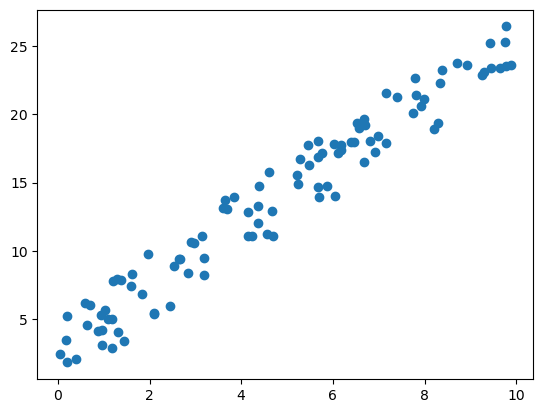

결정계수: 0.95
추정계수(가중치): [[2.21697414]]
절편: [3.30255927]


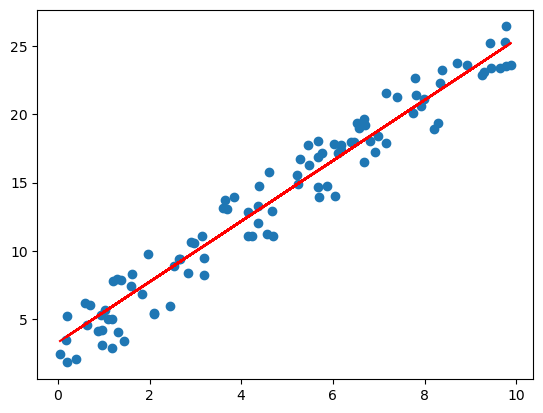

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # 4개의 값으로 가진 튜플 값로 반환한다. 학습데이터와 평가데이터를 분리시켜준다. 
import matplotlib.pyplot as plt
import numpy as np

# 1) 데이터 준비
np.random.seed(0)
x = np.random.rand(100,1) * 10 # [0,10) 범위의 100X1 행렬로 생성
y = (x * 2.3) + np.random.rand(100,1) * 5.4

plt.plot(x, y, 'o')
plt.show()

# 2) 모델 준비
model = LinearRegression()

# 3) 학습데이터와 평가데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size= 0.3,#train_test_split(x, y, 비율), 학습데이터-> test_size= 0.3 == 평가데이터 ->train_size = 0.7
                                                   random_state= 10) # random_state 속성에 임의의 랜덤 값을 넣으면 seed값과 동일하게 고정값으로 반환한다.

# 4) 학습
model.fit(x_train, y_train) # 학습을 위해 분할해둔 데이터를 가지고 학습함
#가중치들이 만들어짐

# 5) 평가
r_square = model.score(x_test, y_test) # 학습할때 사용하지 않은 30% 데이터를 가지고 돌려봄
print(f'결정계수: {r_square:.2f}')
print(f'추정계수(가중치): {model.coef_}')  # coef_ 가중치값을 알 수 있다. 
print(f'절편: {model.intercept_}')


# 6) 예측하고 시각화
plt.plot(x,y,'o')
plt.plot(x, model.predict(x), 'r')
# 예측값으로 만들어진 선!

# [문제] 키와 몸무게를 이용해 모델을 학습 시킨 후, 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하세요.

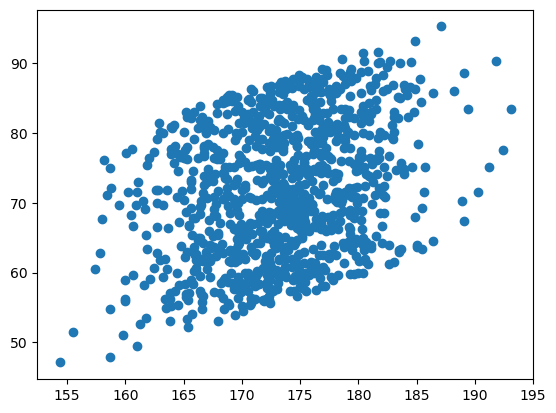

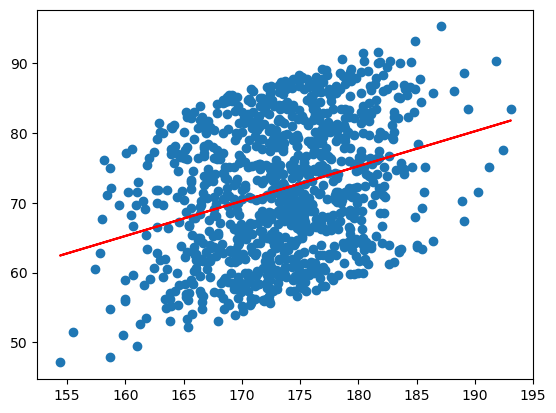

r_square: 0.11434468311138501
예측 값:  [70.24985138]


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # 4개의 값으로 가진 튜플 값로 반환한다. 학습데이터와 평가데이터를 분리시켜준다. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('./dataset/body.csv')
x = df['Height'] # 인덱스 해서 가져오면 시리즈로 반환된다.
x = np.expand_dims(x, axis=1)  # plot하려면 2차원으로 확장해야한다.
y = df['Weight']

plt.plot(x,y,'o')
plt.show()

# 2) 모델 준비
model = LinearRegression()

# 3) 학습데이터와 평가데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size= 0.3,
                                                   random_state= 10) 

# 4) 학습
model.fit(x_train, y_train) # 학습을 위해 분할해둔 학습데이터를 가지고 학습함
#가중치들이 만들어짐

# 5) 평가
r_square = model.score(x_test, y_test) 
# 학습할때 사용하지 않은 30% 평가데이터를 가지고 돌려봄
# 패키지 없이 r2score값 확인

# 6) 예측하고 시각화
plt.plot(x,y,'o')
plt.plot(x, model.predict(x), 'r')# 예측값으로 만들어진 선!
plt.show()
print(f'r_square: {r_square}')

# 5)에측(추론)
x_new = [[170]] 
y_hat = model.predict(x_new)
print('예측 값: ', y_hat)

(1000, 3)
   Number  Height  Weight
0       1   176.0    85.2
1       2   175.3    67.7
2       3   168.6    75.2
3       4   168.1    67.1
4       5   175.3    63.0
MAE = 7.700
RMSE = 9.006
r2 score = 0.114
키 170.0 인 사람의 예측 몸무게: 70.24985137688455
예측 값:  [70.24985138]


<function matplotlib.pyplot.show(close=None, block=None)>

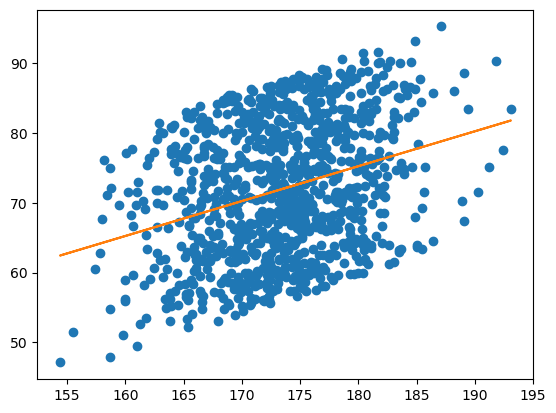

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # MAE, MSE, R2
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# 1) 데이터 준비
df = pd.read_csv('./dataset/body.csv')
print(df.shape)
print(df.head())

x = df['Height'].values.reshape(-1,1) # values => 시리즈의 값만 나옴 reshape => 2차원으로 만들기 위함
# print(x[:10])
y = df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7 ,random_state= 10)

#2) 모델 준비
model = LinearRegression()

#3) 학습
model.fit(x_train, y_train)

#4) 평가
y_hat = model.predict(x_test)
print(f'MAE = {mean_absolute_error(y_test, y_hat):.3f}') 
# MAE = 7.700  // 오차에 대한 절대값 //예측값에 대한 평균 오차값  
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_hat)):.3f}') 
# MAE = 7.700  // 오차에 대한 절대값 //예측값에 대한 평균 오차값 / 
# np.sqrt() 루트씌우는 함수 
print(f'r2 score = {r2_score(y_test, y_hat):.3f}') 
# r2 score = 0.114 11%의 설명력이 있다는 뜻

#5) 예측
x_new = [[170]]
y_hat = model.predict(x_new)

print('키 170.0 인 사람의 예측 몸무게:', y_hat[0])
print('예측 값: ', y_hat)
#6) 시각화
plt.plot(x, y, 'o')
plt.plot(x, model.predict(x))
plt.show

In [13]:
# 
df[df['Height'].between(169,171)]['Weight'].mean()  # between 특정 범위에 있는 조건값을 가지고 옴 # 169~171 사이의 값은 True값이 됨


# 실제 169~ 171 인 사람들의 평균 몸무게: 69.34
# 위에서 예측한 몸무게 값: 70.24 
# R2가 0.11 로 나왔지만 크으게 차이가 나진 않는다. 

69.34271844660194

# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블럭 그룹마다 주택 가격의 데이터

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

# 1) 데이터 준비
data = pd.read_csv('./dataset/california_housing_train.csv')
print(data.shape)
print(data.head())
x = data[data.columns[2:-1]]
y = data['median_house_value']

# 2) 모델 준비
model = LinearRegression()

# 3) 학습
model.fit(x, y)

# 4) 평가하기
test_data = pd.read_csv('./dataset/california_housing_test.csv')
print(test_data.shape)
print(test_data.head())
test_x = test_data[test_data.columns[2:-1]]
test_y = test_data['median_house_value']

print(f'R스퀘어: {model.score(test_x, test_y):.3f}') # R스퀘어: 0.546

# 5) 예측하기
print(type(test_x))
predict_data = test_x[10:11]
y_hat = model.predict(predict_data)

print('test의 10번째의 예측값:', y_hat[0])
print('실제값', test_y[10])

(17000, 9)
   longitude  latitude  housing_median_age  total_rooms  ...  population  households  median_income  median_house_value
0    -114.31     34.19                15.0       5612.0  ...      1015.0       472.0         1.4936             66900.0
1    -114.47     34.40                19.0       7650.0  ...      1129.0       463.0         1.8200             80100.0
2    -114.56     33.69                17.0        720.0  ...       333.0       117.0         1.6509             85700.0
3    -114.57     33.64                14.0       1501.0  ...       515.0       226.0         3.1917             73400.0
4    -114.57     33.57                20.0       1454.0  ...       624.0       262.0         1.9250             65500.0

[5 rows x 9 columns]
(3000, 9)
   longitude  latitude  housing_median_age  total_rooms  ...  population  households  median_income  median_house_value
0    -122.05     37.37                27.0       3885.0  ...      1537.0       606.0         6.6085            344700